<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_10_(12_Feb)_Dynamic_Pricing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_excel('dynamic_pricing.xlsx')

# Encoding categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define independent variables (X) and dependent variable (y)
X = data.drop(columns=['Historical_Cost_of_Ride'])
y = data['Historical_Cost_of_Ride']

# Add constant to the independent variables for the intercept
X = sm.add_constant(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())

# Alternatively, using sklearn's LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Get the coefficients and intercept
print(f'Intercept: {regressor.intercept_}')
print(f'Coefficients: {regressor.coef_}')

# Evaluate the model on test data
y_pred = regressor.predict(X_test)


                               OLS Regression Results                              
Dep. Variable:     Historical_Cost_of_Ride   R-squared:                       0.877
Model:                                 OLS   Adj. R-squared:                  0.876
Method:                      Least Squares   F-statistic:                     626.2
Date:                     Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                             07:20:27   Log-Likelihood:                -4477.5
No. Observations:                      800   AIC:                             8975.
Df Residuals:                          790   BIC:                             9022.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

                               OLS Regression Results                              
Dep. Variable:     Historical_Cost_of_Ride   R-squared:                       0.877
Model:                                 OLS   Adj. R-squared:                  0.876
Method:                      Least Squares   F-statistic:                     626.2
Date:                     Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                             07:21:08   Log-Likelihood:                -4477.5
No. Observations:                      800   AIC:                             8975.
Df Residuals:                          790   BIC:                             9022.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

<Figure size 1000x600 with 0 Axes>

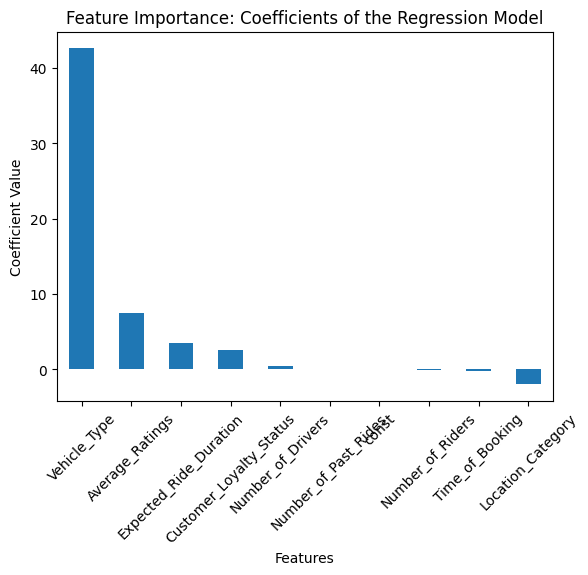

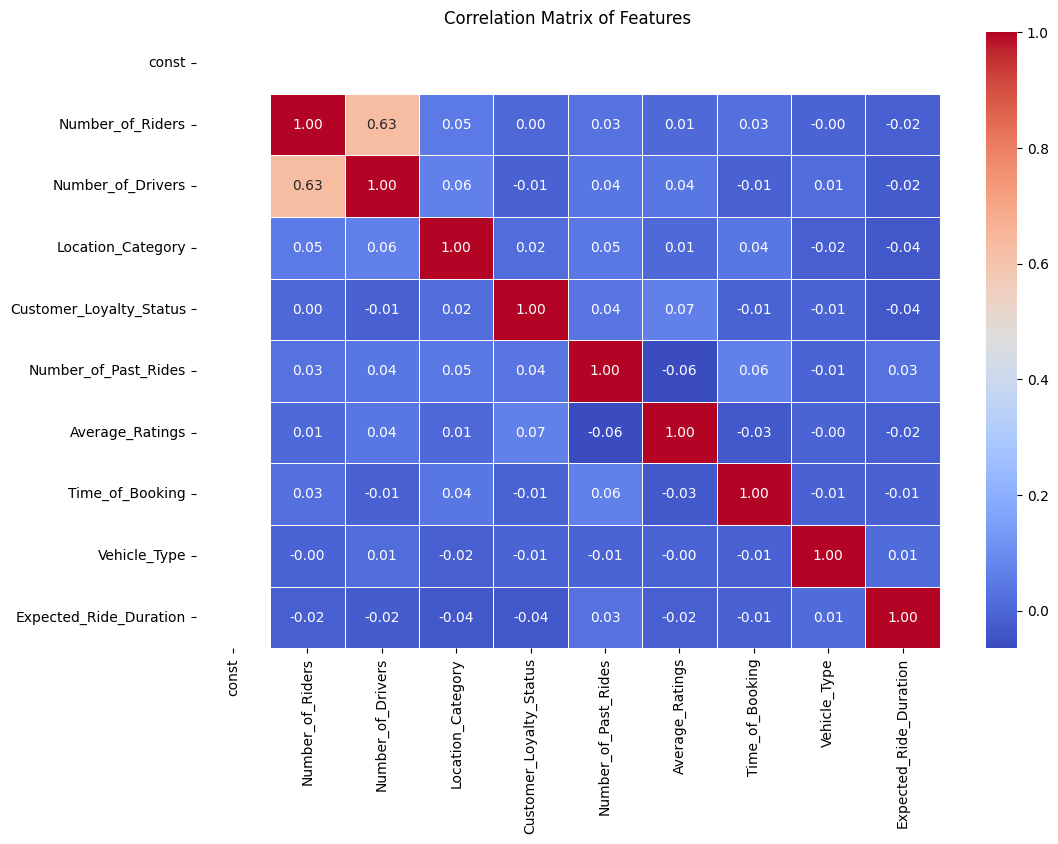

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_excel('dynamic_pricing.xlsx')

# Encoding categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define independent variables (X) and dependent variable (y)
X = data.drop(columns=['Historical_Cost_of_Ride'])
y = data['Historical_Cost_of_Ride']

# Add constant to the independent variables for the intercept
X = sm.add_constant(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())

# Alternatively, using sklearn's LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Get the coefficients and intercept
print(f'Intercept: {regressor.intercept_}')
print(f'Coefficients: {regressor.coef_}')

# Visualize the coefficients using a bar plot
coefficients = regressor.coef_
features = X.columns
coeff_df = pd.DataFrame(coefficients, index=features, columns=["Coefficient"])

# Plot bar graph of the coefficients
plt.figure(figsize=(10, 6))
coeff_df.sort_values(by="Coefficient", ascending=False).plot(kind='bar', legend=False)
plt.title('Feature Importance: Coefficients of the Regression Model')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

# Visualize the correlation matrix of the features using a heatmap
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [5]:
# Create a DataFrame with coefficients and p-values for each feature
coeff_df = pd.DataFrame({
    'Coefficient': regressor.coef_,
    'P-Value': model.pvalues[1:],  # Skip the constant term's p-value
}, index=features)

# Add the absolute value of the coefficients to rank them
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()

# Rank the features by absolute coefficient value
ranked_coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Filter out features with high p-values (insignificant features)
significant_coeff_df = ranked_coeff_df[ranked_coeff_df['P-Value'] < 0.05]

# Display the ranked coefficients based on importance
print("Ranked Factors Affecting Historical_Cost_of_Ride (by magnitude of impact):")
print(significant_coeff_df[['Coefficient', 'P-Value']])


Ranked Factors Affecting Historical_Cost_of_Ride (by magnitude of impact):
                        Coefficient       P-Value
Vehicle_Type              42.632991  4.425390e-19
Expected_Ride_Duration     3.533992  0.000000e+00
Number_of_Drivers          0.475510  2.213103e-03


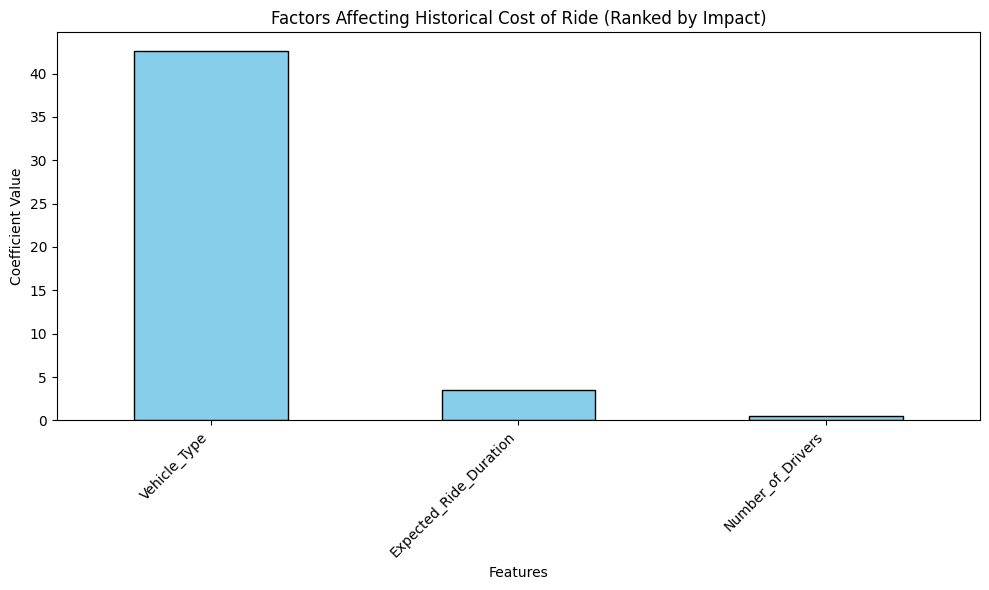

In [6]:
# Filter for significant features (p-value < 0.05)
significant_coeff_df = coeff_df[coeff_df['P-Value'] < 0.05]

# Sort by the absolute value of the coefficients to get the most impactful features
sorted_coeff_df = significant_coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the bar graph for the ranked features based on coefficient magnitude
plt.figure(figsize=(10, 6))
sorted_coeff_df['Coefficient'].plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Factors Affecting Historical Cost of Ride (Ranked by Impact)')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
